In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 


In [2]:
data = pd.read_csv('ag1.txt', header = 0, names = ['b-v', 'v'])
data.head()

,b-v,v
0,0.820441,10.900357
1,-0.033763,6.542515
2,1.692215,14.662077
3,0.803042,15.521706
4,0.559854,9.774405


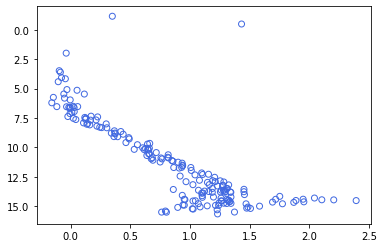

In [3]:
plt.gca().invert_yaxis()
plt.scatter(data['b-v'], data['v'], color = 'none', edgecolor = 'royalblue')

In [4]:
x = data['b-v']
y = data['v']

Text(0, 0.5, 'V')

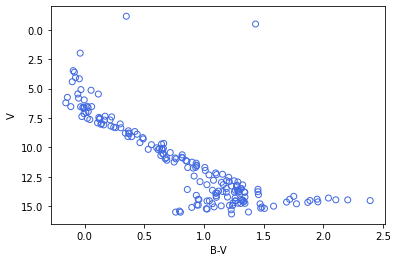

In [5]:
plt.gca().invert_yaxis()
plt.scatter(x,y, color = 'none', edgecolor = 'royalblue')
plt.xlabel('B-V')
plt.ylabel('V')

In [6]:
def linear_func(p, x):
    m, c = p
    return m*x + c

# Model object
modelo = Model(linear_func)

# test data and error

# Create a Data object
data1 = Data(x, y)

initialguess = [0,0]
odr = ODR(data1, modelo, beta0=initialguess)


# Run the regression.
odr.set_job(fit_type=2) #0 = implicit ODR, 1 = explicit ODR, 2 = ordinary least squares
out = odr.run()

#print fit parameters
popt = out.beta
perr = out.sd_beta
popt,perr

(array([5.18605462, 6.89698929]), array([0.25357924, 0.25675369]))

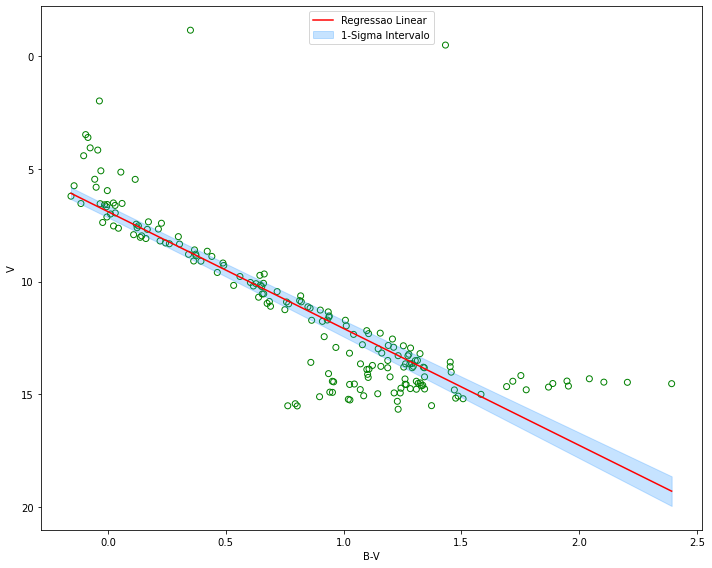

In [7]:
t_fit = np.linspace(x.min(), x.max(), len(x))
fit = linear_func(popt, t_fit) 
sigmay = np.sqrt((t_fit*perr[0])**2 + (perr[1])**2)



fig, ax = plt.subplots(figsize=(10,8))
fig.gca().invert_yaxis()

ax.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear') #Regressao Linear para um wide maior de pontos
#ax.plot(x,popt[0]*x + popt[1], 'r', color = 'red', label='Regressao Linear')
ax.scatter(x,y, color = 'none', edgecolor = 'green')
ax.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
ax.legend(framealpha=0.8, loc = 'upper center')
ax.set_xlabel('B-V')
ax.set_ylabel('V')
fig.tight_layout()

Text(0.5, 0, '(B-V)o')

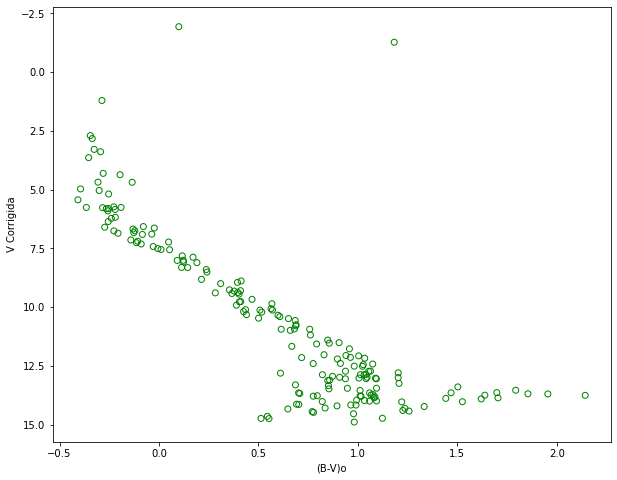

In [8]:
fig, ax = plt.subplots(figsize=(10,8))
fig.gca().invert_yaxis()
x1 = x-0.25
y1 = y-3.1*0.25
ax.scatter(x1,y1, color = 'none', edgecolor = 'green')
ax.set_ylabel('V Corrigida') #V corrigida = V_o
ax.set_xlabel('(B-V)o') #(B-V) corrigida, (B-V)o


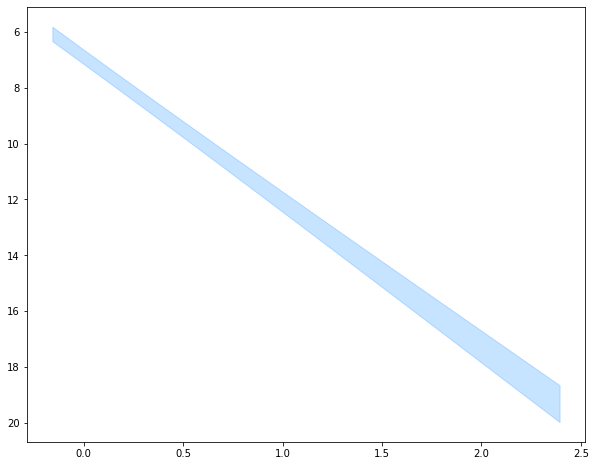

In [9]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')

In [10]:
xadj = []
yadj = []

count = 0


ytentativa = popt[0]*x + popt[1]

for element in y:
    if ytentativa[count] + sigmay[count] >= element and ytentativa[count] - sigmay[count] <= element:
        xadj.append(x[count])
        yadj.append(y[count])
    count+=1
xadj = np.asarray(xadj)
yadj = np.asarray(yadj)


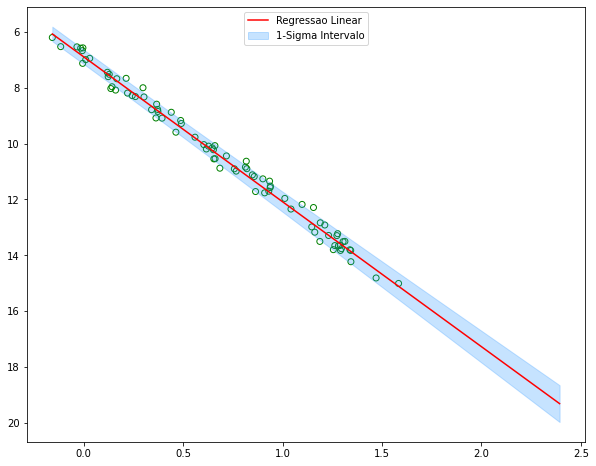

In [11]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, color = 'none', edgecolor = 'green')
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'upper center')

In [12]:
estrelas_antes = len(x)
estrelas_depois = len(xadj)

print('Havia',estrelas_antes, 'estrelas antes do sigma-clipping.' )
print(estrelas_antes - estrelas_depois, 'estrelas foram retiradas.')
print('Apenas', estrelas_depois, 'remanesceram no intervalo 1-sigma.')

Havia 185 estrelas antes do sigma-clipping.
103 estrelas foram retiradas.
Apenas 82 remanesceram no intervalo 1-sigma.


In [13]:
xout = []
yout = []
for a,b in zip(x,y):
    if a not in xadj and b not in yadj:
        xout.append(a)
        yout.append(b)
xout =np.asarray(xout)
yout = np.asarray(yout)

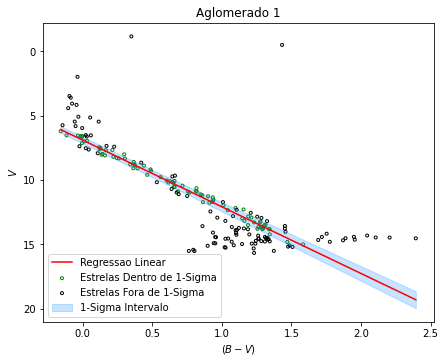

In [14]:
plt.figure(figsize=(7,5.5)) 
plt.gca().invert_yaxis()
plt.plot(t_fit, fit, 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green', label = 'Estrelas Dentro de 1-Sigma')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black', label = 'Estrelas Fora de 1-Sigma')
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'best')
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$")
plt.title('Aglomerado 1');

In [15]:
#Main Sequence

mainsequence = Data(xadj, yadj)

initialguess = [0,0]
odr = ODR(mainsequence, modelo, beta0=initialguess)


# Run the regression.
odr.set_job(fit_type=2) #0 = implicit ODR, 1 = explicit ODR, 2 = ordinary least squares
out = odr.run()

#print fit parameters and 1-sigma estimates
popt_mainsequence = out.beta
perr_mainsequence = out.sd_beta


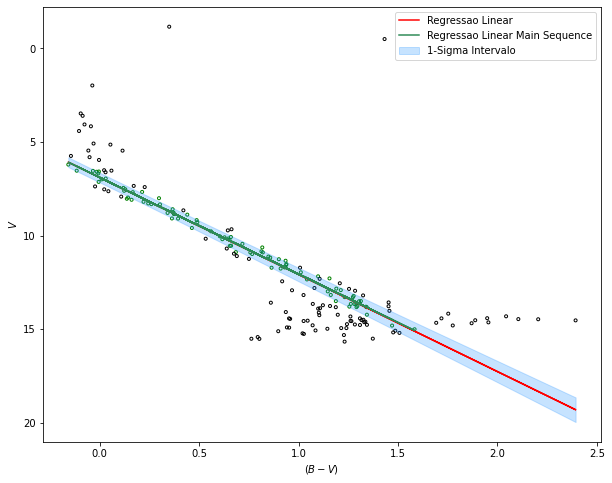

In [16]:
plt.figure(figsize=(10,8))
plt.gca().invert_yaxis()
plt.plot(x, popt[0]*x + popt[1], 'r', color = 'red', label='Regressao Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black')
#plt.plot(xadj, xadj*result.slope + result.intercept, color = 'seagreen')
plt.plot(xadj, xadj*popt_mainsequence[0] + popt_mainsequence[1], color = 'seagreen', label='Regressao Linear Main Sequence')
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(framealpha=0.8, loc = 'best')
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$");
#plt.savefig('test.png', format = 'png')

In [17]:
f = open("LinearRegressAG1.txt", "w")
f.write("Slope, Intercept, Slope_Error, Intercept_Error,TurnOffColor \n")
f.write( str(popt_mainsequence[0]) + ', ' + str(popt_mainsequence[1]) + ', ' + str(perr_mainsequence[0]) + ', ' + str(perr_mainsequence[1]) + ', ' + str(xadj.min()) + '\n')
f.close()

In [18]:
xadj.min()

-0.15759613

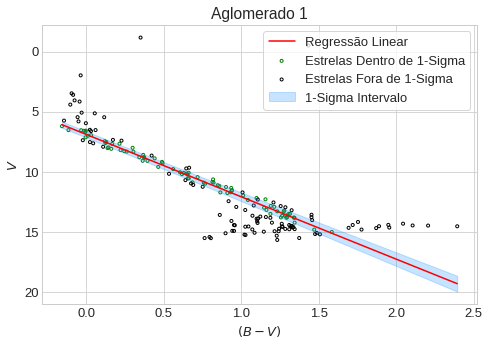

In [20]:
plt.figure(figsize=(7,5)) 



plt.style.use('seaborn-whitegrid')
plt.rc('xtick', labelsize=13) 
plt.rc('ytick', labelsize=13) 


font = {'family' : 'sans-serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

plt.gca().invert_yaxis()
plt.plot(t_fit, fit, 'r', color = 'red', label='Regressão Linear')
plt.scatter(xadj,yadj, marker='.', color = 'none', edgecolor = 'green', label = 'Estrelas Dentro de 1-Sigma')
plt.scatter(xout,yout, marker = ".",color = 'none', edgecolor = 'black', label = 'Estrelas Fora de 1-Sigma')
plt.fill_between(t_fit, fit + sigmay, fit - sigmay, alpha=.25, label='1-Sigma Intervalo', color = 'dodgerblue')
plt.legend(frameon=True,framealpha=0.8, loc = 'best')
plt.xlabel(r"$(B-V)$")
plt.ylabel(r"$V$")
plt.title('Aglomerado 1')
plt.tight_layout();
plt.savefig('./Imagens_Relat/ag1.png', dpi = 1000, format = 'png'); 